In [ ]:
'''
Attribute Information:

Number of times pregnant
Plasma glucose concentration a 2 hours in an oral glucose tolerance test
Diastolic blood pressure (mm Hg)
Triceps skin fold thickness (mm)
2-Hour serum insulin (mu U/ml)
Body mass index (weight in kg/(height in m)^2)
Diabetes pedigree function
Age (years)
Class variable (0 or 1)
'''

'\nAttribute Information:\n\nNumber of times pregnant\nPlasma glucose concentration a 2 hours in an oral glucose tolerance test\nDiastolic blood pressure (mm Hg)\nTriceps skin fold thickness (mm)\n2-Hour serum insulin (mu U/ml)\nBody mass index (weight in kg/(height in m)^2)\nDiabetes pedigree function\nAge (years)\nClass variable (0 or 1)\n'

In [ ]:
import pandas as pd
data=pd.read_csv('/content/diabetes.csv')

In [ ]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:

# Extracting data attributes / features
X = data.drop(['Outcome'], axis=1) # drug خد جميع الداتا ما عدا

# Extracting target/ class labels
y = data.Outcome

import numpy as np
y= np.array(y, dtype='float64')

print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x ,y , test_size =0.2,random_state=0, shuffle = False)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print('--------------')
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614,)
--------------
(154, 8)
(154,)


In [ ]:
# Creating Tensors
import torch

X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)


print(X_train.shape)
print(y_train.shape)
print('----------')
print(X_test.shape)
print(y_test.shape)
print('----------')
print(type(X_train))

torch.Size([614, 8])
torch.Size([614])
----------
torch.Size([154, 8])
torch.Size([154])
----------
<class 'torch.Tensor'>


In [ ]:
import torch.nn as nn

class Model(nn.Module):
  def __init__(self):
    super(Model,self).__init__()
    self.fc1 =torch.nn.Linear(x.shape[1],5) #7
    self.fc2 =torch.nn.Linear(5,3)
    self.fc3 =torch.nn.Linear(3,2)
    self.sigmoid=torch.nn.Sigmoid()

  def forward(self,x):
    #
    out =self.fc1(x)
    out =self.sigmoid(out)
    out =self.fc2(out)
    out =self.sigmoid(out)
    out =self.fc3(out)
    return out

In [ ]:
# f = torch.tensor([[1.0, 2.0,3.0,4.0,5.0,6.0],[1.0, 2.0,3.0,4.0,5.0,6.0]])
# print(f.shape)
net = Model()
# net.forward(f)


In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(),lr=0.01)

In [ ]:
def train_MLP( model, X_train, y_train, criterion,optimizer):

    model.train()
    running_loss = 0.0
    running_corrects = 0.0

    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


      # get the scores with largest values & their corresponding idx (so the class that is most likely)
    # max_scores, max_idx_class = mdl(X).max(dim=1)  # [B, n_classes] -> [B], # get values & indices with the max vals in the dim with scores for each class/label
    max_scores, preds = torch.max(outputs, dim=1)

    running_loss += loss.item() * X_train.size(0)
    # This: correct += (preds == labels).sum().item() and this: running_corrects += torch.sum(preds == labels.data) are the same.
    running_corrects += torch.sum(preds == y_train.data)

    epoch_loss = running_loss / len(X_train)
    epoch_acc = running_corrects / len(X_train)

    return epoch_acc,epoch_loss

def vaildate_MLP(model,X_test,y_test,criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0.0

    outputs = model(X_test)
    loss = criterion(outputs, y_test)

    _, preds = torch.max(outputs, 1)
    running_loss += loss.item() * X_test.size(0)
    running_corrects += torch.sum(preds == y_test.data)

    epoch_loss = running_loss / len(X_test)
    epoch_acc = running_corrects/ len(X_test)

    return epoch_acc,epoch_loss

In [ ]:
number_of_iteration =614
final_losses=[]
final_accuarcy = []
preds = []


test_losses = []
test_accuarcy = []
for i in range(number_of_iteration):
    i= i+1
    epoch_acc, epoch_loss = train_MLP( net, X_train, y_train, loss_function,optimizer)
    final_losses.append(epoch_loss)
    final_accuarcy.append(epoch_acc)



    test_acc,test_loss = vaildate_MLP(net,X_test,y_test,loss_function)
    test_losses.append(test_loss)
    test_accuarcy.append(test_acc)

    if i % 10 == 1:
        print("Epoch number: {} and the loss : {}".format(i,epoch_loss))
        print("Epoch number: {} and the accuarcy : {}".format(i,100*epoch_acc))


Epoch number: 1 and the loss : 0.7217820286750793
Epoch number: 1 and the accuarcy : 34.6905517578125
Epoch number: 11 and the loss : 0.6478985548019409
Epoch number: 11 and the accuarcy : 65.3094482421875
Epoch number: 21 and the loss : 0.6415606141090393
Epoch number: 21 and the accuarcy : 65.3094482421875
Epoch number: 31 and the loss : 0.63787442445755
Epoch number: 31 and the accuarcy : 65.3094482421875
Epoch number: 41 and the loss : 0.6313249468803406
Epoch number: 41 and the accuarcy : 65.3094482421875
Epoch number: 51 and the loss : 0.6254770755767822
Epoch number: 51 and the accuarcy : 65.3094482421875
Epoch number: 61 and the loss : 0.6183700561523438
Epoch number: 61 and the accuarcy : 65.3094482421875
Epoch number: 71 and the loss : 0.6106518507003784
Epoch number: 71 and the accuarcy : 65.3094482421875
Epoch number: 81 and the loss : 0.6023865342140198
Epoch number: 81 and the accuarcy : 65.3094482421875
Epoch number: 91 and the loss : 0.5941219925880432
Epoch number: 91 

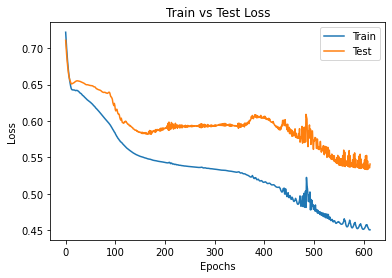

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(number_of_iteration),final_losses, )
plt.plot(range(number_of_iteration),test_losses,)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.title('Train vs Test Loss')
plt.show()

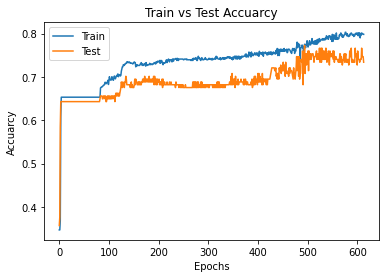

In [ ]:
plt.plot(range(number_of_iteration),final_accuarcy, )
plt.plot(range(number_of_iteration),test_accuarcy,)
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend(['Train','Test'])
plt.title('Train vs Test Accuarcy')
plt.show()

Text(0.5, 0, 'Epochs')

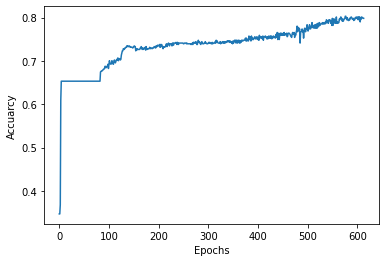

In [ ]:
#plot the loss function
plt.plot(range(number_of_iteration),final_accuarcy)
plt.ylabel('Accuarcy')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

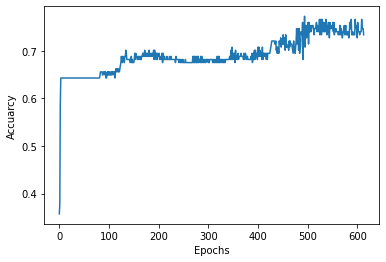

In [ ]:
#plot the loss function
plt.plot(range(number_of_iteration),test_accuarcy)
plt.ylabel('Accuarcy')
plt.xlabel('Epochs')

In [ ]:
print(len(preds))
print(len(y_train))
print(len(predictions))
print(len(y_test))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix as cm
from sklearn.model_selection import train_test_split
#Calculating Confusion Matrix
CM = cm(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
